In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\cc.xlsx",1)

In [3]:
df.head()

,customer_id,order_item_id,price,freight_value,payment_value,frequency,recency
0,b4afeb58ac51bc903c5362286c6a5cfe,20,154.40,93.84,992.96,8.0,288
1,08a0a61f98f22952682f7e463ef2d43e,21,131.94,76.74,1252.08,6.0,170
2,cc3f0f9c25480b83c834bf8af1435a29,21,23.88,NaN,426.60,6.0,9
3,620732fed5579e0bdfdddee02aad4c54,12,173.40,84.66,774.18,6.0,692
4,109f80397e4897bbcf56313c25850332,21,131.60,61.24,1157.04,6.0,112


The dataset contains the following features.


Attribute     |   Description
----------------|-------------
customer_id	  |  Customer unique id
order_item_id	| Order Id
price	       | Price of Item
freight_value	 |Freight cost of items
payment_value	|Total sum of a customer's                        purchases
frequency	|     No of days in which a customer                   made a repeat purchase
recency	     |   customer's age in days at time                   of most recent purchase

In [4]:
df[df.duplicated()]

,customer_id,order_item_id,price,freight_value,payment_value,frequency,recency


In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print(".............")
        print(df[i].unique())
        print(df[i].value_counts())
    elif df[i].dtype == 'int32' or df[i].dtype =='int64':
        print(i)
        print(".............")
        print(df[i].unique())
        print(df[i].value_counts())
    elif df[i].dtype == 'float64':
        print(i)
        print(".............")
        print(df[i].unique())
        print(df[i].describe())
        print(df[i].info())

customer_id
.............
['b4afeb58ac51bc903c5362286c6a5cfe' '08a0a61f98f22952682f7e463ef2d43e'
 'cc3f0f9c25480b83c834bf8af1435a29' ... 'e11ea1af27379694ad1f1fcd1b16ee6c'
 '463ebb2bb8608b2f8f3e3b04351601d1' '2e7204294e95c84c31df5254dad1b0ce']
b4afeb58ac51bc903c5362286c6a5cfe    1
9302710415234bb43b1971474511267d    1
841de7bc0b593cc61eff8ca0fb1dfef8    1
e3ba5dc186f78dc33ea7d927d8005119    1
a4e18e14c32019f5f66dba4c4db390fa    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    1
ff2f5165c3155db5bb78c26df35a565a    1
001028b78fd413e19704b3867c369d3a    1
16f5cb910633b2a0a8d93b9da0168381    1
2e7204294e95c84c31df5254dad1b0ce    1
Name: customer_id, Length: 96770, dtype: int64
order_item_id
.............
[20 21 12 15 10  6  3  2  1]
1     87510
3      7246
6      1131
2       465
10      292
15       70
21       48
12        7
20        1
Name: order_item_id, dtype: int64
price
.............
[154.4  131.94  23.88 ... 593.36 125.62  34.54]
count    96770.000000
me

In [6]:
df.isnull().sum()

customer_id          0
order_item_id        0
price                0
freight_value     9746
payment_value        0
frequency        14626
recency              0
dtype: int64

# EDA

In [7]:
df['customer_id'].unique().shape

(96770,)

INSIGHTS:
* Each customer as a unique customer id.

In [8]:
df['order_item_id'].unique()

array([20, 21, 12, 15, 10,  6,  3,  2,  1], dtype=int64)

In [9]:
df['order_item_id'].value_counts()

1     87510
3      7246
6      1131
2       465
10      292
15       70
21       48
12        7
20        1
Name: order_item_id, dtype: int64

INSIGHTS:
* There are 9 items in the dataset.
* The items whose order item id is 1,3,6 are frequently purchased.
* The items whose order item id is 20,12,21,15 are less purchased.

In [10]:
df['price'].describe()

count    96770.000000
mean       119.682151
std        122.655268
min          0.850000
25%         45.500000
50%         84.990000
75%        148.900000
max        982.000000
Name: price, dtype: float64

INSIGHTS:
* The minimum price is 0.85 and the maximum price is 982.
* The Average price is 119.
* 75% of the price is 148 and maximum price is 982.Outliers are present between the 75% and maximum price of the data.

In [11]:
df['freight_value'].unique()

array([93.84, 76.74,   nan, ..., 86.53, 98.13, 60.86])

In [12]:
df['freight_value'].describe()

count    87024.000000
mean        21.708607
std         16.220297
min          0.000000
25%         13.780000
50%         17.060000
75%         23.620000
max        312.410000
Name: freight_value, dtype: float64

INSIGHTS:
* The minimum freight_value is 0 and the maximum freight_value is 312.
* The Average freight_value is 21.
* 75% of the freight_value is 23 and maximum freight_value is 312.Outliers are present between the 75% and maximum freight_value of the data.

In [13]:
df.head()

,customer_id,order_item_id,price,freight_value,payment_value,frequency,recency
0,b4afeb58ac51bc903c5362286c6a5cfe,20,154.40,93.84,992.96,8.0,288
1,08a0a61f98f22952682f7e463ef2d43e,21,131.94,76.74,1252.08,6.0,170
2,cc3f0f9c25480b83c834bf8af1435a29,21,23.88,NaN,426.60,6.0,9
3,620732fed5579e0bdfdddee02aad4c54,12,173.40,84.66,774.18,6.0,692
4,109f80397e4897bbcf56313c25850332,21,131.60,61.24,1157.04,6.0,112


In [14]:
df['payment_value'].describe()

count    96770.000000
mean       162.523740
std        168.489635
min          9.590000
25%         62.250000
50%        107.780000
75%        189.190000
max       1265.480000
Name: payment_value, dtype: float64

INSIGHTS:
* The minimum payment_value is  9.59 and the maximum payment_value is 1265.
* The Average payment_value is 162.
* 75% of the payment_value is 189 and maximum payment_value is 1265.Outliers are present between the 75% and maximum payment_value of the data. 

In [15]:
df['frequency'].unique()

array([ 8.,  6., nan,  5.,  4.,  3.,  2.,  1.])

In [16]:
df.frequency.value_counts()

1.0    74265
2.0     6561
3.0      925
4.0      282
5.0       63
6.0       47
8.0        1
Name: frequency, dtype: int64

INSIGHTS:
* Most of the customers are purchasing the items everyday.
* less customers are purchasing the items for ever 3-8 days.

In [17]:
pd.set_option('display.max_rows',None)

In [18]:
df.recency.value_counts()

282    1063
283     437
281     422
280     399
279     379
278     369
118     369
27      364
111     360
26      354
110     352
31      342
272     340
116     339
109     327
25      322
33      322
117     321
17      315
186     313
122     312
41      309
277     309
46      304
19      304
230     300
237     300
223     299
188     298
229     298
167     297
20      297
83      294
194     293
200     292
137     291
166     287
123     286
187     286
18      285
132     282
139     279
28      279
34      279
30      279
130     278
165     278
208     277
32      277
199     275
228     272
153     271
131     271
195     270
271     269
171     269
124     268
185     268
24      267
192     266
181     266
275     266
136     266
276     265
144     265
265     265
39      265
160     264
270     261
235     261
40      259
264     259
81      258
215     258
222     258
193     258
209     258
115     257
184     256
60      254
13      253
150     253
146     253
138 

INSIGHTS :
* The minium recency is 0 and the maximum recency is 728.
* 

In [19]:
df.isnull().sum()

customer_id          0
order_item_id        0
price                0
freight_value     9746
payment_value        0
frequency        14626
recency              0
dtype: int64

In [20]:
df.frequency.mean()

1.1187061745227893

In [21]:
df.frequency.median()

1.0

In [22]:
df.frequency.fillna(df.frequency.median(),inplace = True)

In [23]:
df.isnull().sum()

customer_id         0
order_item_id       0
price               0
freight_value    9746
payment_value       0
frequency           0
recency             0
dtype: int64

In [24]:
df.frequency.describe()

count    96770.000000
mean         1.100765
std          0.381018
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: frequency, dtype: float64

In [25]:
df.head()

,customer_id,order_item_id,price,freight_value,payment_value,frequency,recency
0,b4afeb58ac51bc903c5362286c6a5cfe,20,154.40,93.84,992.96,8.0,288
1,08a0a61f98f22952682f7e463ef2d43e,21,131.94,76.74,1252.08,6.0,170
2,cc3f0f9c25480b83c834bf8af1435a29,21,23.88,NaN,426.60,6.0,9
3,620732fed5579e0bdfdddee02aad4c54,12,173.40,84.66,774.18,6.0,692
4,109f80397e4897bbcf56313c25850332,21,131.60,61.24,1157.04,6.0,112


In [26]:
import matplotlib.pyplot as plt

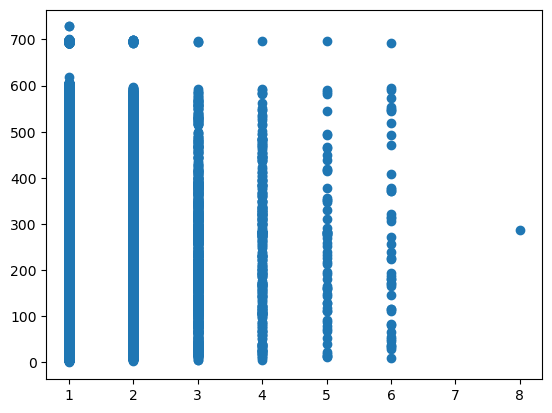

In [27]:
plt.scatter(df.frequency,df.recency)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
x = df[['payment_value','frequency','recency']]

In [31]:
x.head()

,payment_value,frequency,recency
0,992.96,8.0,288
1,1252.08,6.0,170
2,426.60,6.0,9
3,774.18,6.0,692
4,1157.04,6.0,112


In [32]:
x = sc.fit_transform(x)

In [40]:
from sklearn.cluster import KMeans

In [41]:
sse = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(x)
    sse.append(Kmeans.inertia_)

In [42]:
print(sse)

[290310.00000000023, 191044.92234155507, 129684.8819022397, 98728.06645248058, 78941.18850941787, 64918.8147622753, 56064.94766834566, 50925.52953983187, 46310.01286530824, 42467.47699731591]


In [43]:
import matplotlib.pyplot as plt

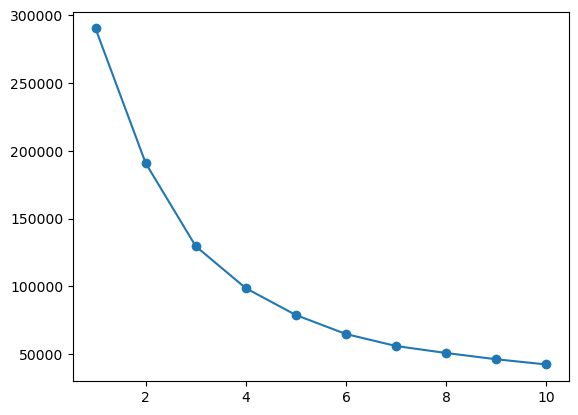

In [44]:
plt.plot(range(1,11),sse , marker = 'o')

In [45]:
km = KMeans(n_clusters = 2,random_state = 0)
y_kmeans = km.fit_predict(x)
print(y_kmeans)

[0 0 0 ... 1 1 1]


In [54]:
x = pd.DataFrame(x)

In [55]:
x.head()

,0,1,2
0,4.928734,18.107447,0.281694
1,6.466640,12.858330,-0.487755
2,1.567323,12.858330,-1.537597
3,3.630250,12.858330,2.916079
4,5.902567,12.858330,-0.865959


In [49]:
df['clusters'] = y_kmeans

In [50]:
km.cluster_centers_

array([[ 1.92264075e+00,  2.20051809e+00,  1.68743556e-02],
       [-2.30960804e-01, -2.64341337e-01, -2.02706341e-03]])

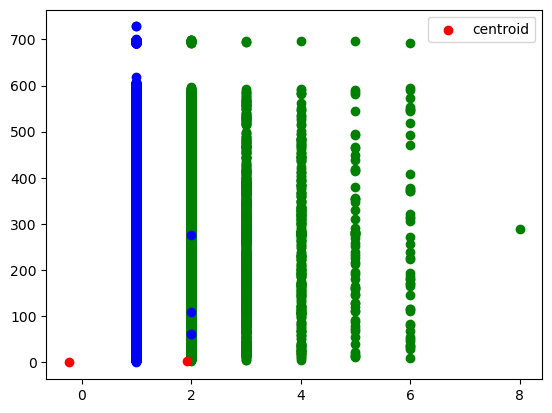

In [51]:
d1 = df[df.clusters == 0]
d2 = df[df.clusters == 1]
plt.scatter(d1.frequency,d1.recency,color = 'green')
plt.scatter(d2.frequency,d2.recency,color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'red',marker = 'o',label = 'centroid')
plt.legend()